In [24]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/T1.nii.gz')
# image_data_seg = nib.load('../images/estandarizada_t1.nii.gz').get_fdata()
image = image_data.get_fdata()

In [25]:
def threshold(image, tau, tol):
    while True:
        binary_image = image >= tau

        mBG = np.mean(image[binary_image == False])
        mFG = np.mean(image[binary_image == True])

        new_tau = 0.5 * (mBG + mFG)

        if abs(tau - new_tau) < tol:
            break

        tau = new_tau

    return binary_image

In [26]:
res = threshold(image, 127, 1)

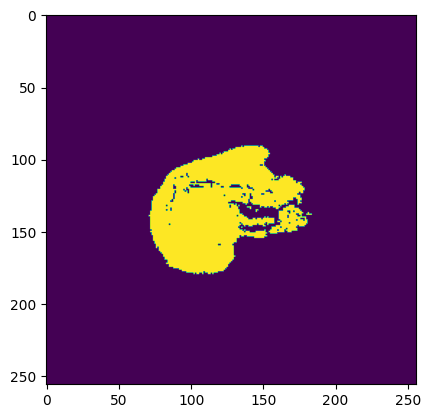

In [27]:
plt.imshow(res[:,:,25])

(array([8.699143e+06, 2.718740e+05, 2.069920e+05, 1.875830e+05,
        1.905550e+05, 2.144060e+05, 2.639350e+05, 3.568740e+05,
        4.348990e+05, 3.885990e+05, 2.888900e+05, 2.196340e+05,
        1.911480e+05, 2.354330e+05, 2.033160e+05, 7.892200e+04,
        4.449300e+04, 3.173400e+04, 2.188500e+04, 1.531500e+04,
        1.042300e+04, 7.167000e+03, 4.978000e+03, 3.318000e+03,
        2.421000e+03, 1.657000e+03, 1.221000e+03, 9.900000e+02,
        7.440000e+02, 5.950000e+02, 5.020000e+02, 5.170000e+02,
        4.350000e+02, 4.110000e+02, 3.340000e+02, 2.670000e+02,
        2.630000e+02, 2.300000e+02, 1.840000e+02, 1.460000e+02,
        1.180000e+02, 8.500000e+01, 7.100000e+01, 5.800000e+01,
        4.600000e+01, 3.600000e+01, 3.400000e+01, 1.800000e+01,
        1.100000e+01, 2.000000e+00]),
 array([  0.        ,  12.55127441,  25.10254883,  37.65382324,
         50.20509766,  62.75637207,  75.30764648,  87.8589209 ,
        100.41019531, 112.96146973, 125.51274414, 138.06401855,
  

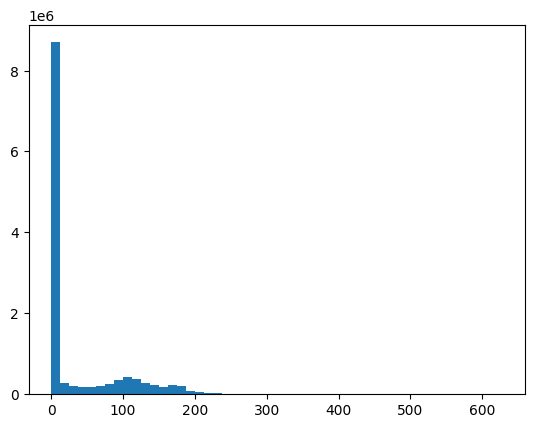

In [28]:
plt.hist(image.flatten(), 50)